### 데이터 수집/표준화/분리

In [15]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('./data/05_생선_분류_데이터셋.csv')
df.head(3)

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


In [8]:
fish_input = df.drop(columns ='Species')
fish_target = df['Species']

In [9]:
from sklearn.preprocessing import StandardScaler as sc

In [11]:
std = sc()
std.fit(fish_input)

StandardScaler()

In [12]:
scaled_input = std.transform(fish_input)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
train_x, test_x, train_y, test_y = train_test_split(scaled_input,fish_target )
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((119, 5), (40, 5), (119,), (40,))

### 로지스틱회귀로 다중 분류 (종속변수가 3개 이상) 진행하기
#### 다중분류 : 이진분류와 다르게 종속변수의 범주가 많음
#### 이진분류함수 : Sigmoid, 다중분류함수  :Softmax
#### - 범주가 많다보니 규제강도를 설정하는것이 일반화에 좋음
#### - 범주가 많다는 것은 복잡도가 커진다는 의미로 복잡도가 커지면 학습을 위한 훈련반복횟수가 많아짐
#### - 반복을 통해 정확도를 높이게 됨
#### LogisticRegression
#### - C : 규제강도(값이 작을수록 규제강도가 세짐, 기본값 1 - 회귀모델의 릿지,라쏘 alpha값과 동일)
#### - max_iter : 훈련반복횟수(기본값 100, 반복횟수는 높을수록 성능에 좋음)
#### - 훈련중 반복횟수를 초과하여 훈련이 필요할 경우 경고창이 뜸


In [16]:
from sklearn.linear_model import LogisticRegression as lcs

In [17]:
lr = lcs(C=20, max_iter=1000)
lr

LogisticRegression(C=20, max_iter=1000)

In [18]:
lr.fit(train_x, train_y)

LogisticRegression(C=20, max_iter=1000)

In [20]:
print('훈련평가 :',lr.score(train_x, train_y))
print('테스트평가 :',lr.score(test_x, test_y))
print('[설명] 훈련평가가 테스트평가보다 조금 높게 나오므로 과대적합이 있음')

훈련평가 : 0.9327731092436975
테스트평가 : 0.925
[설명] 훈련평가가 테스트평가보다 조금 높게 나오므로 과대적합이 있음


In [21]:
# 테스트데이터 상위 5개 예측하기
lr.predict(test_x[:5])

array(['Parkki', 'Perch', 'Pike', 'Pike', 'Perch'], dtype=object)

In [35]:
test_y[:5]

69     Parkki
112     Perch
129      Pike
134      Pike
87      Perch
Name: Species, dtype: object

In [41]:
proba = np.round(lr.predict_proba(test_x[:5]),decimals=3)
proba

array([[0.098, 0.838, 0.001, 0.   , 0.048, 0.   , 0.016],
       [0.003, 0.   , 0.87 , 0.001, 0.005, 0.   , 0.121],
       [0.   , 0.   , 0.082, 0.887, 0.03 , 0.001, 0.   ],
       [0.   , 0.   , 0.001, 0.999, 0.   , 0.   , 0.   ],
       [0.   , 0.003, 0.779, 0.002, 0.21 , 0.003, 0.004]])

In [39]:
lr.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

### 다중분류 알고리즘 해석
#### <span style = 'color=red'>Z값 확인하기</span>
#### <span style = 'color=red'>각 리스트의 양수값중에 서 가장 큰값이 좋은 값으로 소프트맥스함수에 넣어서 분류</span>

### 소프트맥스(Softmax)
#### - 소프트맥스 함수는 다중분류에서 사용(딥러니에서도 사용됨)
#### - 값의 범위 : 0~1 사잇값 사용
#### - 종속변수 2개 이상일 때 주로 사용
#### - 범주(종속변수)들의 z값 전체를 확률로 변환하여 사용
#### - 종속변수들 중에 확률이 가장 큰 값을 선택하게 됨

In [44]:
decision = np.round(lr.decision_function(test_x[:5]),decimals=3)
decision

array([[  3.342,   5.489,  -1.837,  -3.851,   2.623,  -7.303,   1.536],
       [  2.569,  -5.135,   8.147,   0.833,   2.926, -15.514,   6.174],
       [ -5.194,  -7.552,   4.453,   6.833,   3.446,  -0.213,  -1.773],
       [ -2.683,  -9.035,   3.445,  10.83 ,   1.163,  -1.394,  -2.327],
       [ -5.272,  -0.767,   4.887,  -1.155,   3.578,  -0.811,  -0.461]])

In [46]:
from scipy.special import softmax

In [47]:
# 소프트맥스 결과값 확인하기
# axis = 1 : 각 행의 열 단위로 확률 계산
proba = np.round(softmax(decision, axis = 1),decimals=3)
proba

array([[0.098, 0.838, 0.001, 0.   , 0.048, 0.   , 0.016],
       [0.003, 0.   , 0.87 , 0.001, 0.005, 0.   , 0.121],
       [0.   , 0.   , 0.082, 0.887, 0.03 , 0.001, 0.   ],
       [0.   , 0.   , 0.001, 0.999, 0.   , 0.   , 0.   ],
       [0.   , 0.003, 0.779, 0.002, 0.21 , 0.003, 0.004]])

In [27]:
from sklearn.metrics import confusion_matrix

In [24]:
y_pred = lr.predict(test_x)

In [30]:
cm = confusion_matrix(test_y,y_pred)

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

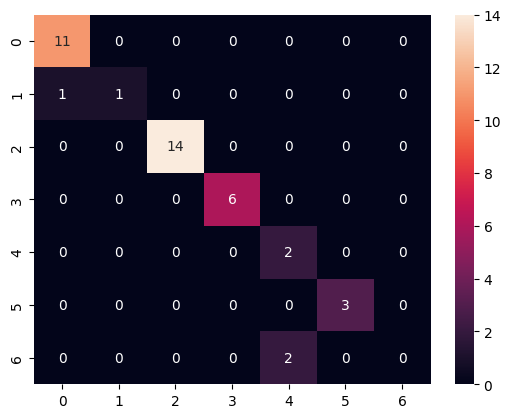

In [34]:
sns.heatmap(cm, annot=True)